<a href="https://colab.research.google.com/github/michhottinger/CS-Data-Science-Build-Week-1/blob/master/cs_build_week_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import the data
df = pd.read_csv('https://raw.githubusercontent.com/michhottinger/CS-Data-Science-Build-Week-1/master/datasets_33180_43520_heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#dealing with categorical data. One hot encoding would work here too

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['sex'], prefix = "sex")
e = pd.get_dummies(df['restecg'], prefix = "restecg")

frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis = 1)
df.head()


df_copy = df.drop(columns = ['cp', 'thal', 'slope', 'sex', 'restecg'])
df_copy.head()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2
0,63,145,233,1,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
1,37,130,250,0,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
2,41,130,204,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0
3,56,120,236,0,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
4,57,120,354,0,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0


In [4]:
df_drop = df_copy.drop(columns=['target'])
df_drop.head(5)

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2
0,63,145,233,1,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
1,37,130,250,0,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
2,41,130,204,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0
3,56,120,236,0,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
4,57,120,354,0,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0


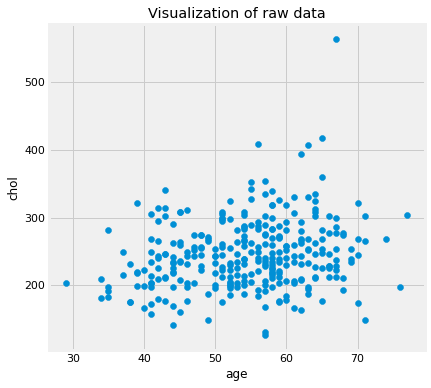

In [5]:
# Plot the data to see what some of the features look like
#could also use crosstabs here
plt.figure(figsize=(6, 6))
plt.scatter(df_copy.age, df_copy.chol)
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of raw data');

In [6]:
#make a copy called data to use clusters on just a few features
data = df_copy[['chol', 'age']]
data.shape

(303, 2)

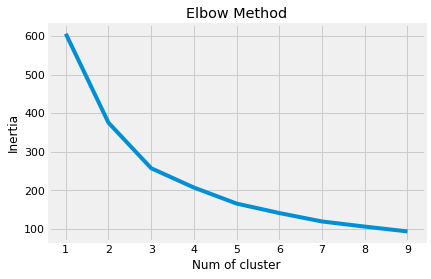

In [7]:
#uses sklearn kMeans
# Standardize the the small data set
X_std = StandardScaler().fit_transform(data)

#use elbow graph to see how many clusters might work
elbow = []
for i in range(1,10):
    km = KMeans(n_clusters = i, max_iter = 20, random_state = 42)
    km.fit(X_std)
    elbow.append(km.inertia_)

#Plot cluster
plt.plot(range(1,10), elbow)
plt.xlabel('Num of cluster')
plt.title('Elbow Method')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Run sklearn KMeans: on samll data set here

km = KMeans(n_clusters=3, max_iter=500, random_state = 42)
km.fit(X_std)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [9]:
centroids = km.cluster_centers_
centroids


array([[ 1.12796899,  0.57406348],
       [-0.30406765, -1.15211421],
       [-0.54069438,  0.56294192]])

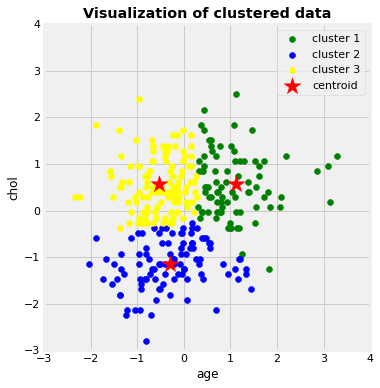

In [10]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='yellow', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [11]:
data['cluster'] = km.labels_
data.head(5)
data.describe()

,chol,age,cluster
count,303.000000,303.000000,303.000000
mean,246.264026,54.366337,1.115512
std,51.830751,9.082101,0.811664
min,126.000000,29.000000,0.000000
25%,211.000000,47.500000,0.000000
50%,240.000000,55.000000,1.000000
75%,274.500000,61.000000,2.000000
max,564.000000,77.000000,2.000000


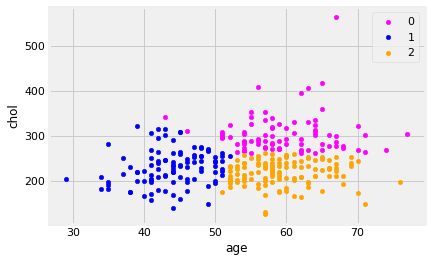

In [12]:
fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = data.groupby('cluster')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()

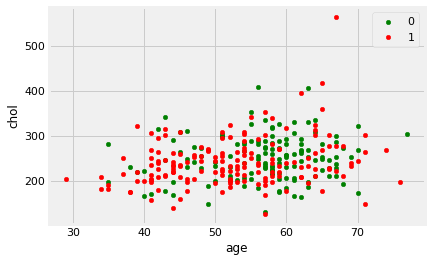

In [13]:
# diagnosis of heart disease (angiographic disease status)
# -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing

#check out the same data on the whole dataset that we have preped showing the target

fig, ax = plt.subplots()
colors = {0:'green', 1:'red'}
groups = df_copy.groupby('target')
for key, item in groups:
    item.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()

In [14]:

# features = ['age',	'trestbps',	'chol', 
#             'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 
#             'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 
#             'thal_3', 'slope_0',	'slope_1', 'slope_2', 'sex_0', 'sex_1', 'restecg_0', 
#             'restecg_1', 'restecg_2']


In [15]:
X = df_copy
X = df_copy.drop(columns = ['target', 'fbs'])

X.shape


(303, 23)

In [16]:
#standardize X
X_std4 = StandardScaler().fit_transform(X)
X_std4

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.03015751,
        -1.00330579, -0.11566299],
       [-1.91531289, -0.09273778,  0.07219949, ..., -0.97072534,
         0.9967051 , -0.11566299],
       [-1.47415758, -0.09273778, -0.81677269, ...,  1.03015751,
        -1.00330579, -0.11566299],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ..., -0.97072534,
         0.9967051 , -0.11566299],
       [ 0.29046364, -0.09273778, -2.2275329 , ..., -0.97072534,
         0.9967051 , -0.11566299],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  1.03015751,
        -1.00330579, -0.11566299]])

In [17]:
#pca data to deal with categorical stuff using X_std4 already scaled
from sklearn.decomposition import PCA
std_pca = StandardScaler().fit_transform(X)

Z = std_pca

# Perform PCA
pca = PCA(17)
pca.fit(Z)
transformed_data = pca.transform(Z)
transformed_data


array([[-1.62112536, -0.12095947,  2.82656366, ..., -1.88492586,
         0.2996017 ,  0.65685634],
       [ 1.27428504, -1.12910123, -0.29545932, ...,  1.50073412,
        -0.6175843 ,  0.00723903],
       [ 2.8378528 ,  1.18818343,  1.25930517, ...,  0.16168342,
         0.75113694, -1.29899997],
       ...,
       [-2.81678637, -0.95989108, -1.52929975, ...,  0.35434812,
        -1.4332154 , -0.65046448],
       [-2.64128428, -1.72022332, -2.05344669, ..., -0.20106437,
         0.29418351,  0.31721672],
       [ 1.49524766,  2.33295678,  0.68369835, ...,  0.31574419,
         0.15500249,  0.92701527]])

In [18]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

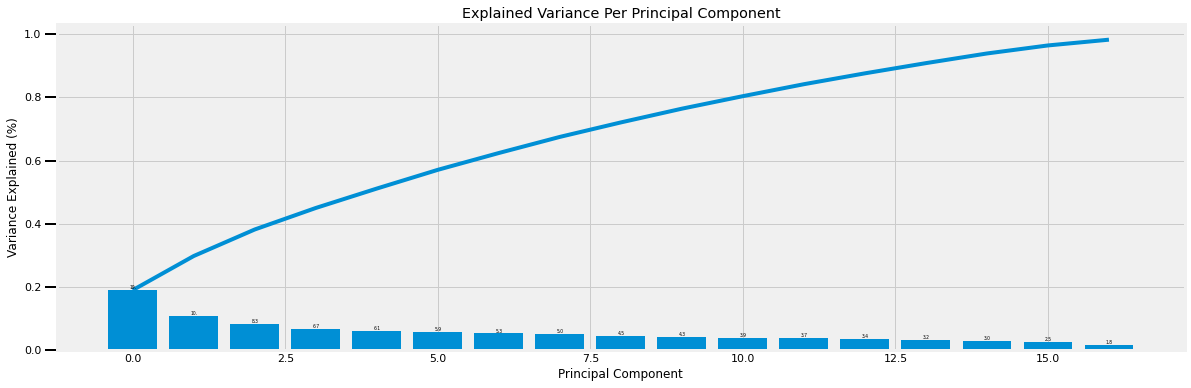

In [19]:
scree_plot(pca)#find where the variance is highest

In [20]:
# K-Means on PCA data
kmeanspca = KMeans(n_clusters=3, max_iter=1000, n_init=500, random_state=42)
kmeanspca.fit(transformed_data)
print(kmeanspca.labels_)
centroidspca = kmeanspca.cluster_centers_
centroidspca

[1 0 2 0 2 1 2 0 0 0 0 2 0 1 2 2 2 2 0 2 1 0 0 1 0 2 0 0 2 0 2 0 0 0 0 2 2
 0 2 2 2 0 1 2 0 0 0 0 2 2 2 1 1 2 2 0 0 0 0 2 2 0 1 0 0 2 0 2 0 2 1 0 0 0
 2 2 0 0 0 1 0 0 2 1 2 2 0 0 2 2 0 0 0 2 2 1 2 0 0 0 0 1 2 0 0 2 1 2 2 2 2
 0 2 0 0 2 0 1 2 2 2 0 2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 0 1 1 2 0 2 2 2 0 2 2
 0 0 1 2 1 2 2 2 0 0 1 0 0 2 0 0 0 1 1 2 1 1 1 0 0 0 1 1 1 0 1 1 1 1 2 1 1
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 2 1 1 1 1 1 1 0 1 1 1 2 1 0 1 1 1 2
 1 1 0 1 2 1 0 1 0 1 1 0 1 1 0 1 0 1 0 2 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1
 2 1 1 1 1 1 2]


array([[ 1.31674551e+00, -1.31764673e+00,  4.93731850e-01,
        -1.48257628e-02,  1.30129479e-01,  3.57529529e-03,
         1.39907949e-01,  1.42168142e-01, -1.59007272e-01,
        -1.37353694e-03,  1.11040594e-01,  1.02902668e-01,
        -1.07313908e-01, -6.00310996e-02,  1.61258256e-01,
        -1.55509012e-01,  1.80624986e-03],
       [-2.17826029e+00, -1.16847068e-01,  1.90704046e-02,
         1.12536454e-01, -1.37343629e-01, -3.78048620e-02,
        -1.35154638e-01,  1.25574132e-02,  3.28661814e-02,
         2.71569383e-02,  1.94317531e-02, -8.59101856e-03,
        -3.40658222e-02,  2.99973425e-02,  2.09865106e-02,
         6.01509311e-02, -4.22431665e-03],
       [ 1.60847493e+00,  1.77930694e+00, -6.30252487e-01,
        -1.47979691e-01,  4.39711126e-02,  5.14251070e-02,
         2.88160533e-02, -1.91905624e-01,  1.45413649e-01,
        -3.83979980e-02, -1.64089043e-01, -1.12814067e-01,
         1.81138479e-01,  2.89442869e-02, -2.27624310e-01,
         1.00885835e-01,  4.0

In [21]:
#PCA's datatable with pca clusters
X_copy = X
X_copy['cluster_pca'] = kmeanspca.labels_
X_copy

,age,trestbps,chol,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2,cluster_pca
0,63,145,233,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1
1,37,130,250,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
2,41,130,204,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,2
3,56,120,236,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,57,120,354,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,1,0.2,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1
299,45,110,264,132,0,1.2,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
300,68,144,193,141,0,3.4,2,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1
301,57,130,131,115,1,1.2,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1


In [22]:

# Applying k-means to the dataset without PCA
kmeans4 = KMeans(n_clusters=3, max_iter=1000, n_init=500, random_state=42) 
y_kmeans4 = kmeans4.fit_predict(X_std4)

centroids4 = kmeans4.cluster_centers_
centroids4

#kmeans.labels_ are the same thing as y_means


array([[ 0.3624704 ,  0.20793097,  0.05830431, -0.63147956,  0.60730552,
         0.65599028,  0.39460433,  0.5445667 , -0.37776087, -0.36064053,
         0.11905004,  0.0205469 ,  0.34304481, -0.76865974,  0.61580321,
         0.11759654,  0.69775543, -0.75696524, -0.43231168,  0.43231168,
         0.2694913 , -0.29255812,  0.10156357],
       [-0.52567367, -0.15784649, -0.25633371,  0.64210092, -0.41945603,
        -0.48794402, -0.21487822, -0.38450004,  0.33670537,  0.18317247,
        -0.0600626 , -0.08151391, -0.2090081 ,  0.2655093 , -0.15638612,
        -0.03664502, -0.74624543,  0.76421022, -0.68100522,  0.68100522,
        -0.23039869,  0.25670107, -0.11566299],
       [ 0.1062006 , -0.11432925,  0.22656767,  0.1487675 , -0.3846142 ,
        -0.37293198, -0.32023539, -0.33466544,  0.14681132,  0.30878362,
        -0.10242432,  0.06908801, -0.25131234,  0.81044998, -0.71797045,
        -0.12883756, -0.11955931,  0.18502161,  1.46841752, -1.46841752,
        -0.11668998,  0.1186

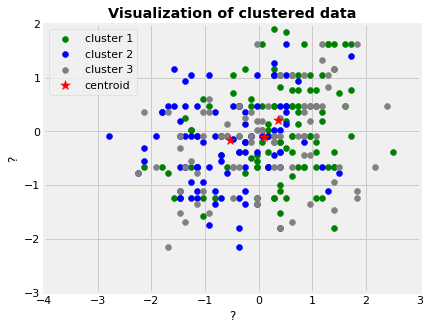

In [23]:
# Visualising the clusters
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std4[y_kmeans4 == 0, 0], X_std4[y_kmeans4 == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std4[y_kmeans4 == 1, 0], X_std4[y_kmeans4 == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std4[y_kmeans4 == 2, 0], X_std4[y_kmeans4 == 2, 1],
            c='grey', label='cluster 3')
# plt.scatter(X_std4[kmeans4.labels_ == 3, 0], X_std4[kmeans4.labels_ == 3, 1],
#             c='magenta', label='cluster 4')
plt.scatter(centroids4[:, 0], centroids4[:, 1], marker='*', s=100,
            c='red', label='centroid')
plt.legend()
plt.xlim([-4, 3])
plt.ylim([-3, 2])
plt.xlabel('?')
plt.ylabel('?')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

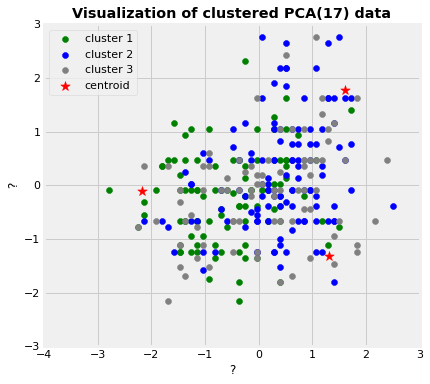

In [24]:
# Visualising the clusters with PCA 15
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(std_pca[kmeanspca.labels_ == 0, 0], std_pca[kmeanspca.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(std_pca[kmeanspca.labels_ == 1, 0], std_pca[kmeanspca.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(std_pca[kmeanspca.labels_ == 2, 0], std_pca[kmeanspca.labels_ == 2, 1],
            c='grey', label='cluster 3')
# plt.scatter(std_pca[kmeanspca.labels_ == 3, 0], std_pca[kmeanspca.labels_ == 3, 1],
#             c='magenta', label='cluster 4')
plt.scatter(centroidspca[:, 0], centroidspca[:, 1], marker='*', s=100,
            c='red', label='centroid')
plt.legend()
plt.xlim([-4, 3])
plt.ylim([-3, 3])
plt.xlabel('?')
plt.ylabel('?')
plt.title('Visualization of clustered PCA(17) data', fontweight='bold')
ax.set_aspect('equal');

The results using all the features is a mess--the clusters appear to not create groups.


In [25]:
X['clusters'] = pd.DataFrame(kmeans4.labels_).values
X.head()

,age,trestbps,chol,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2,cluster_pca,clusters
0,63,145,233,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0
1,37,130,250,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
2,41,130,204,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,2,2
3,56,120,236,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1
4,57,120,354,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,2,2


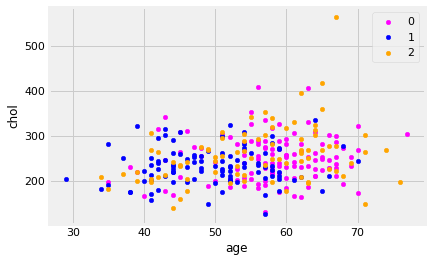

In [26]:
#data with cluster lables-- non-pca
fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = X.groupby('clusters')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()

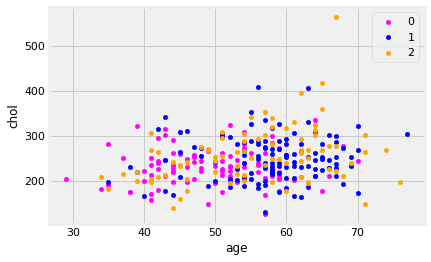

In [27]:
#pca data with cluster labels


fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = X_copy.groupby('cluster_pca')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()

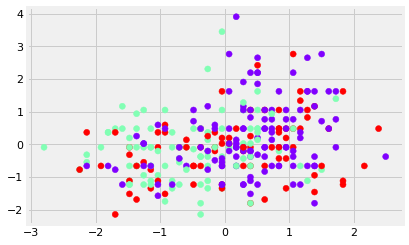

In [28]:
plt.scatter(X_std4[:, 0], X_std4[:, 1], c=kmeans4.labels_, cmap='rainbow')

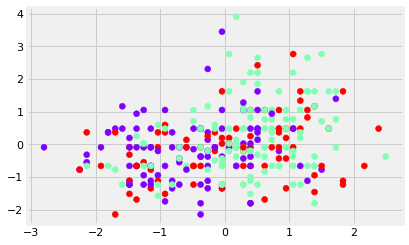

In [29]:
plt.scatter(std_pca[:, 0], std_pca[:, 1], c=kmeanspca.labels_, cmap='rainbow')

In [30]:
#try using a dataset with only continous numerical data
#create dataset
M = df_drop[['trestbps', 'oldpeak','thalach']] 
M.head(10)
#thalach: maximum heart rate achieved
#trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#oldpeak = ST depression induced by exercise relative to rest

,trestbps,oldpeak,thalach
0,145,2.3,150
1,130,3.5,187
2,130,1.4,172
3,120,0.8,178
4,120,0.6,163
5,140,0.4,148
6,140,1.3,153
7,120,0.0,173
8,172,0.5,162
9,150,1.6,174


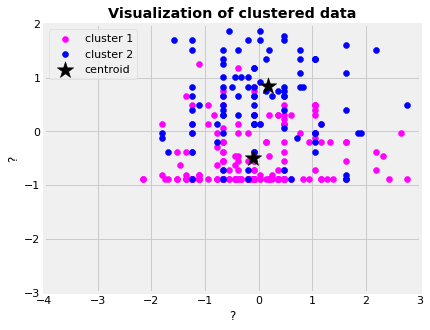

In [57]:

#standardize X
X_stdm = StandardScaler().fit_transform(M)
X_stdm

# Applying k-means to the dataset without PCA
kmeansm = KMeans(n_clusters=2, max_iter=1000, n_init=500, random_state=42) 
y_kmeansm = kmeansm.fit_predict(X_stdm)

centroidsm = kmeansm.cluster_centers_


#kmeans.labels_ are the same thing as y_means

# Visualising the clusters
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_stdm[y_kmeansm == 0, 0], X_stdm[y_kmeansm == 0, 1],
            c='magenta', label='cluster 1')
plt.scatter(X_stdm[y_kmeansm == 1, 0], X_stdm[y_kmeansm == 1, 1],
            c='blue', label='cluster 2')
#plt.scatter(X_stdm[y_kmeansm == 2, 0], X_stdm[y_kmeansm == 2, 1],
 #           c='grey', label='cluster 3')
#plt.scatter(X_stdm[kmeansm.labels_ == 3, 0], X_stdm[kmeansm.labels_ == 3, 1],
#            c='magenta', label='cluster 4')
plt.scatter(centroidsm[:, 0], centroidsm[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()
plt.xlim([-4, 3])
plt.ylim([-3, 2])
plt.xlabel('?')
plt.ylabel('?')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');



In [32]:
#create labels
df_drop['clustersm'] = pd.DataFrame(kmeansm.labels_).values
df_drop.head(5)

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2,clustersm
0,63,145,233,1,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1
1,37,130,250,0,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
2,41,130,204,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0
3,56,120,236,0,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,57,120,354,0,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


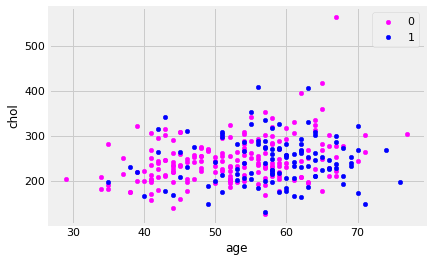

In [33]:

#data with cluster lables-- non-pca
fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = df_drop.groupby('clustersm')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x= 'age', y= 'chol', label=key, color=colors[key])
plt.show()

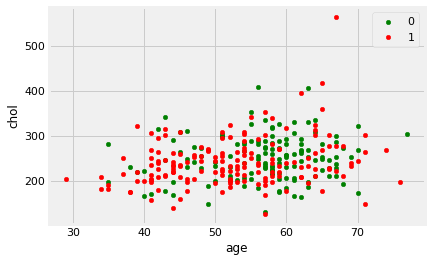

In [34]:
# diagnosis of heart disease (angiographic disease status)
# -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing

#check out the same data on the whole dataset that we have preped showing the target

fig, ax = plt.subplots()
colors = {0:'green', 1:'red'}
groups = df_copy.groupby('target')
for key, item in groups:
    item.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()

In [44]:
# Compare numeric diagnosis to clusters and get accuracy percentage
(~(df_copy['target'] == df_drop['clustersm'])).value_counts()[1]/df.shape[0]

0.7425742574257426

In [45]:
# Compare numeric diagnosis to clusters and get accuracy percentage
((df_copy['target'] == df_drop['clustersm'])).value_counts()[0]/df.shape[0]

0.7425742574257426

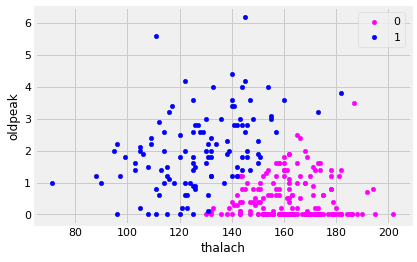

In [64]:
#data with cluster lables-- non-pca
fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = df_drop.groupby('clustersm')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x= 'thalach', y= 'oldpeak', label=key, color=colors[key])
plt.show()